# import

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from common_helper import *
from original_helper import *

# data load & preprocessing

In [2]:
train_dr = "../input/train.json"
test_dr = "../input/test.json"
traindf, testdf = data_load(train_dr, test_dr)

In [3]:
x_train, y_train = data_preprocessing(traindf)
x_test, _ = data_preprocessing(testdf)

# vectorizer

In [4]:
tfidf = TfidfVectorizer(analyzer=lambda d: d.split(',')).fit(traindf['ingredients_string'])
x_train = tfidf.fit_transform(traindf['ingredients_string']).toarray()
y_train = traindf['cuisine']
x_test = tfidf.transform(testdf['ingredients_string'])

# visualization

/root/anaconda3/envs/ml_python/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


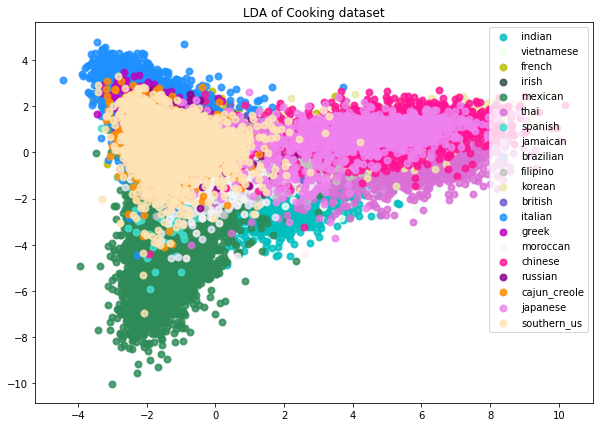

In [6]:
lda_visualization(x_train,traindf)

# model

In [7]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# check & sumbit

In [8]:
check_predictions = clf.predict(x_train)
predictions = clf.predict(x_test)
accuracy_score(y_train, check_predictions)
save_submission(testdf, predictions)

저장했다.
